

In this notebook, we will discuss how to perform basic data manipulations, such as filtering data rows that meet certain conditions, choosing data columns, and arranging data in ascending or descending order.

We will be working with the dataset `penguins` containing data on individual penguins on Antarctica.


In [1]:
import pandas as pd
import numpy as np

In [2]:
penguins = pd.read_csv('penguins.csv', header=0)

FileNotFoundError: [Errno 2] No such file or directory: 'penguins.csv'

## Basics of Selecting Rows and Columns

 use `penguins.columns` to check the variable names.

In [ ]:
penguins.columns

Accessing the rows and columns of a data frame is similar, but not identical, to accessing the rows and columns of an array. 
Recall that the first argument to the `[]` method
is always applied to the rows of the array.  
Similarly, 
passing in a slice to the `[]` method creates a data frame whose *rows* are determined by the slice:m

In [ ]:
penguins[:3]

Similarly, an array of Booleans can be used to subset the rows:

In [ ]:
female_idx = penguins['sex'] == 'female'
penguins[female_idx]

However, if we pass in a list of strings to the [] method, then we obtain a data frame containing the corresponding set of columns.

In [ ]:
penguins[['species', 'island']]

We can use the `set_index()` method to re-name the rows using the contents of `penguins['rowid']`. 

In [ ]:
penguins_re = penguins.set_index('rowid')
penguins_re

In [ ]:
penguins_re.columns

We see that the column `'rowid'` is no longer there.
 
Now that the index has been set to `rowid`, we can  access rows of the data 
frame by `rowid` using the `{loc[]`} method 

In [ ]:
penguins_re.loc[1:5]

As an alternative to using the index name, we could retrieve the first five rows of `penquins_re` using the `{iloc[]`} method:

In [ ]:
penguins_re.iloc[:5]

We can also use it to retrieve the 1st, 3rd and and 4th columns of `penguins_re` for first five rows:

In [ ]:
penguins_re.iloc[:5,[0,2,3]]

Another example for multiple condistions

In [ ]:
new_idx = (penguins['body_mass_g'] > 3500) & (penguins['sex'] == 'female')
penguins.loc[new_idx, ['island','species']]

## Sorting Data

In [ ]:
penguins.sort_values('flipper_length_mm')

 Arranging in descending order

In [ ]:
penguins.sort_values('flipper_length_mm', ascending= False)

## Counting

In [ ]:
penguins['species'].value_counts()

In [ ]:
count_peng = penguins[['species', 'island', 'sex']].value_counts()

In [ ]:
count_peng

In [ ]:
count_peng.info()

In [ ]:
count_peng = count_peng.reset_index().rename(columns={0: "count"})

In [ ]:
count_peng

## Grouping

In many data analysis settings, we want to break a dataset into subsets and then perform some summary calculation on each subset. The simplest example is counting, which we have done previously with the `.value_counts()`

In [ ]:
penguins['species'].value_counts()

The function `.value_counts()` here does all the work for us, but what if instead of counting we wanted to calculate the mean weight of the penguins for each species, or calculate the mean weight and count at the same time? We need a general framework that allows us to do these kinds of calculations with maximum flexibility.

The pandas approach is to first group a dataset with `.groupby()` and then to calculate grouped summaries with various methods.

In [ ]:
penguins.groupby('species')

In [ ]:
penguins.groupby('species').count()

In [ ]:
penguins.groupby('species')['rowid'].count()

In [ ]:
penguins.groupby('species').count().rowid

In [ ]:
penguins.groupby('species').mean()

In [ ]:
penguins.groupby(['species', 'island']).count().rowid

In [ ]:
penguins.groupby(['species', 'island', 'sex'])['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'].mean()

In [ ]:
penguins.groupby(['species', 'island', 'sex'])['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'].agg(["mean", "median","max"])

## Combining Data Frames

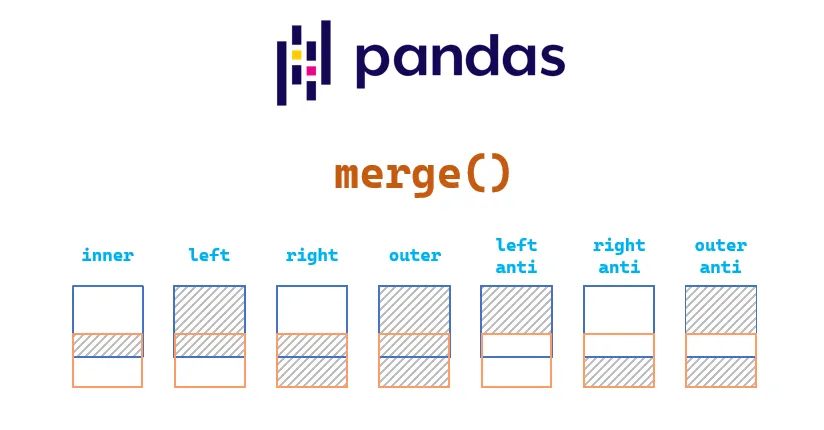

In [ ]:
df_scores = pd.DataFrame({
    "id": ["1003", "1004", "1005", "1006", "1007"],
    "fname": ["Mike", "Tom", "Mary", "Bob", "Kevin"],
    "lname": ["Brown", "Davis", "Clark", "Lopez", "Wilson"],
    "gender": ["M", "M", "F", "M", "M"],
    "subject": ["Math", "Art", "Engilish", "Physics", "Music"],
    "score": [85, 78, 88, 90, 80]
})
df_scores

In [ ]:
df_students = pd.DataFrame({
    "id": ["1001", "1002", "1003", "1004", "1005"],
    "first_name": ["John", "Sarah", "Mike", "Tom", "Mary"],
    "last_name": ["Doe", "Smith", "Brown", "Davis", "Clark"],
    "gender": ["M", "F", "M", "M", "F"]
})
df_students

In [ ]:
pd.merge(df_scores, df_students, how='inner', on="id")

In [ ]:
pd.merge(df_scores, df_students, how='left', on="id")

In [ ]:
pd.merge(df_scores, df_students, how='right', on="id")

In [ ]:
pd.merge(df_scores, df_students, how='outer', on="id")


left exclusive join (also called left anti join) will select the data that the values of the key column only exist on the left side.

## Missing Values Treatment

In [ ]:
penguins.info()

In [ ]:
retail = pd.read_csv('online_retail_II.csv', header=0)

In [ ]:
retail.info()

In [ ]:
retail.isnull().sum()

In [ ]:
import missingno as msno 
msno.matrix(retail);

In [ ]:
retail_missing_removed = retail.dropna()

In [ ]:
retail_missing_removed.isnull().sum()

In [ ]:
removed_all = retail.dropna(how = 'all')

In [ ]:
removed_all.isnull().sum()

In [ ]:
removed_any = retail.dropna(how = 'any')

In [ ]:
removed_any.isnull().sum()

In [ ]:
removed_any.shape

In [ ]:
removed_column = retail.dropna(axis= 1, how = 'any')

In [ ]:
removed_column.isnull().sum()

In [ ]:
removed_column.shape

In [ ]:
thresh = retail.shape[0]*0.9

In [ ]:
removed_column = retail.dropna(axis= 1, thresh = thresh)

In [ ]:
removed_column.isnull().sum()

In [ ]:
removed_column.shape

In [ ]:
ors_fill_na_with_0 = retail.fillna(0)

## Data Imputation

In [ ]:
titanic_df = pd.read_csv ('titanic.csv')

In [ ]:
titanic_df.info()

In [ ]:
Age_mean = titanic_df['Age'].mean()

In [ ]:
Age_mean

In [ ]:
titanic_df['Age (na_by_mean)'] = titanic_df['Age'].fillna(Age_mean)

In [ ]:
titanic_df.info()

In [ ]:
titanic_df['Age (na_by_ffill)'] = titanic_df['Age'].fillna(method= 'ffill')

In [ ]:
titanic_df['Age (na_by_fback)'] = titanic_df['Age'].fillna(method= 'bfill')

 Imputing categorical data

In [ ]:
most_frequent = titanic_df['Cabin'].value_counts().index[0]

In [ ]:
titanic_df['cabin(na_filled)'] = titanic_df['Cabin'].fillna(most_frequent )

In [ ]:
titanic_df.info()